## 2.5 ネットワークデータのハンドリング

### 2.5.1 NetworkXとの連携

Graphオブジェクトを作る

In [27]:
# ライブラリの読み込み
# まだインストールされていない場合はインストール
# !pip install networkx numpy matplotlib pandas scipy
# !pip install torch torch-geometric

In [10]:
import networkx as nx
import numpy as np

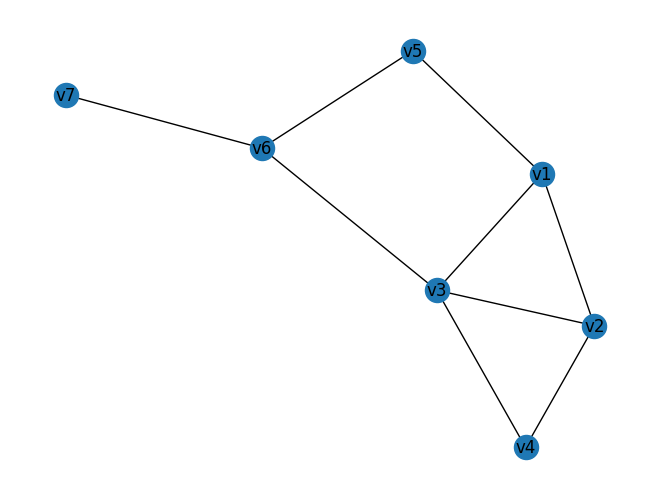

In [11]:
# エッジリストの作成
edge_list = [
    ("v1", "v2"),
    ("v1", "v3"),
    ("v1", "v5"),
    ("v2", "v3"),
    ("v2", "v4"),
    ("v3", "v4"),
    ("v3", "v6"),
    ("v5", "v6"),
    ("v6", "v7"),
]

# エッジリストからGraphオブジェクトの作成
G = nx.Graph(edge_list)
nx.draw(G, with_labels=True)

In [12]:
# ノード一覧の確認
print(G.nodes())
# ノードに付随する情報も合わせて確認（ここでは空）
print(G.nodes(data=True))

# エッジ一覧の確認
print(G.edges())
# エッジに付随する情報も合わせて確認（ここでは空）
print(G.edges(data=True))

['v1', 'v2', 'v3', 'v5', 'v4', 'v6', 'v7']
[('v1', {}), ('v2', {}), ('v3', {}), ('v5', {}), ('v4', {}), ('v6', {}), ('v7', {})]
[('v1', 'v2'), ('v1', 'v3'), ('v1', 'v5'), ('v2', 'v3'), ('v2', 'v4'), ('v3', 'v4'), ('v3', 'v6'), ('v5', 'v6'), ('v6', 'v7')]
[('v1', 'v2', {}), ('v1', 'v3', {}), ('v1', 'v5', {}), ('v2', 'v3', {}), ('v2', 'v4', {}), ('v3', 'v4', {}), ('v3', 'v6', {}), ('v5', 'v6', {}), ('v6', 'v7', {})]


In [13]:
# 命名の対応を作成する
mapping = {
    "v1": "a",
    "v2": "b",
    "v3": "c",
}

# 命名の対応にしたがって名前をつける
H = nx.relabel_nodes(G, mapping)
print(H.nodes())

['a', 'b', 'c', 'v5', 'v4', 'v6', 'v7']


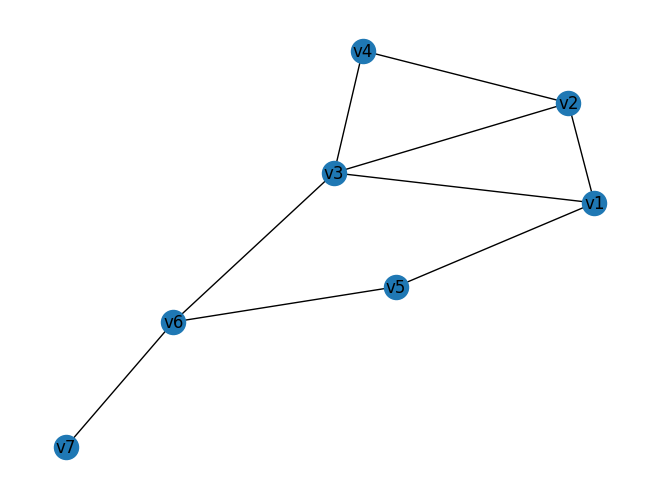

In [14]:
# 隣接リストの作成
adj_list = {
    "v1": ["v2", "v3", "v5"],
    "v2": ["v1", "v3", "v4"],
    "v3": ["v1", "v2", "v4", "v6"],
    "v4": ["v2", "v3"],
    "v5": ["v1", "v6"],
    "v6": ["v3", "v5", "v7"],
    "v7": ["v6"],
}

# 隣接リストからGraphオブジェクトの作成
G = nx.Graph(adj_list)
nx.draw(G, with_labels=True)

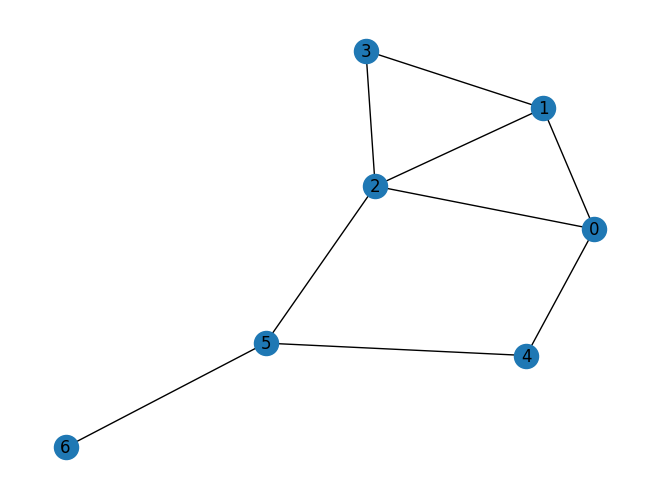

In [15]:
# 隣接行列の作成
adj_matrix = np.array(
    [[0, 1, 1, 0, 1, 0, 0],
    [1, 0, 1, 1, 0, 0, 0],
    [1, 1, 0, 1, 0, 1, 0],
    [0, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 1, 0]],
)

# 隣接行列からGraphオブジェクトの作成
G = nx.from_numpy_array(adj_matrix)
nx.draw(G, with_labels=True)

DataFrameオブジェクトからGraphオブジェクトを作る

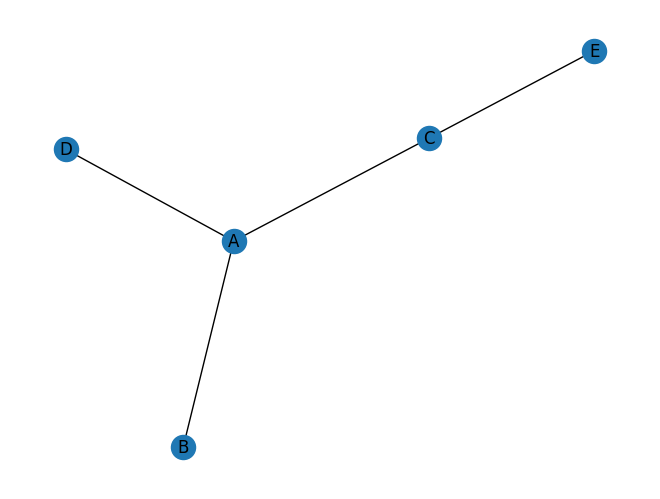

In [19]:
import pandas as pd

# データフレームの作成
data = {
    "source": ["A", "B", "C", "A"],  # 辞書のキーが列名に対応
    "target": ["D", "A", "E", "C"],  # ノード間の接続情報を表す
}
df = pd.DataFrame(data)  # 辞書からDataFrameを作成

# NetworkXグラフの作成
# 第2・第3引数にはノードを示す列名を指定
G_df = nx.from_pandas_edgelist(df, "source", "target")

# グラフの描画
nx.draw(G_df, with_labels=True)

ノードやエッジの追加

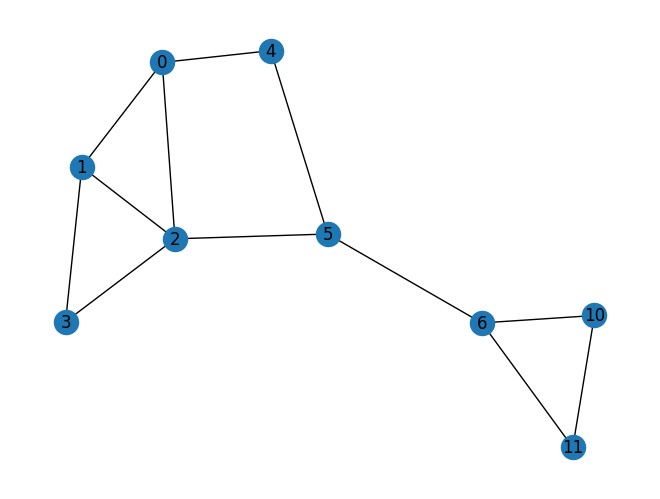

In [20]:
newG = G.copy()

# ノード単体の追加
newG.add_node(10)

# エッジ単体の追加
# このタイミングでノード11も追加される
newG.add_edge(10, 11)

# 複数のエッジの追加
newG.add_edges_from([(11, 6), (10, 6)])
nx.draw(newG, with_labels=True)

Graphオブジェクトを汎用的なデータに戻す

In [23]:
# 隣接行列（スパース行列）
mat_adj = nx.adjacency_matrix(G)
print(mat_adj)

# 隣接行列（密行列）
print(mat_adj.todense())

# エッジリスト
edge_list = nx.edges(G)
print(edge_list)

# 隣接リスト
adj_list = nx.to_dict_of_lists(G)
print(adj_list)

<Compressed Sparse Row sparse array of dtype 'int64'
	with 18 stored elements and shape (7, 7)>
  Coords	Values
  (0, 1)	1
  (0, 2)	1
  (0, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (2, 5)	1
  (3, 1)	1
  (3, 2)	1
  (4, 0)	1
  (4, 5)	1
  (5, 2)	1
  (5, 4)	1
  (5, 6)	1
  (6, 5)	1
[[0 1 1 0 1 0 0]
 [1 0 1 1 0 0 0]
 [1 1 0 1 0 1 0]
 [0 1 1 0 0 0 0]
 [1 0 0 0 0 1 0]
 [0 0 1 0 1 0 1]
 [0 0 0 0 0 1 0]]
[(0, 1), (0, 2), (0, 4), (1, 2), (1, 3), (2, 3), (2, 5), (4, 5), (5, 6)]
{0: [1, 2, 4], 1: [0, 2, 3], 2: [0, 1, 3, 5], 3: [1, 2], 4: [0, 5], 5: [2, 4, 6], 6: [5]}


ノードやエッジに情報を追加する

In [24]:
newG = G.copy()

# 0番目のノードに"name", "signal"という名前で属性情報を追加
newG.nodes[0]['name'] = "v1"
newG.nodes[0]["signal"] = 1.3

# 複数のノードに属性情報を追加
newG.add_nodes_from(
    [
        (1, {"name": "v2", "signal": 1.4}),
        (2, {"name": "v3", "signal": 1.5}),
    ]
)

# 0番目と4番目をつなぐエッジに属性"weight"を追加
newG.edges[0, 4]["weight"] = 2
# "weight"以外の属性を自由に設定することも可能
newG.edges[0, 2]["name"] = "fuga"

# ノード情報の表示
print(newG.nodes(data=True))

# エッジ情報の表示
print(newG.edges(data=True))

[(0, {'name': 'v1', 'signal': 1.3}), (1, {'name': 'v2', 'signal': 1.4}), (2, {'name': 'v3', 'signal': 1.5}), (3, {}), (4, {}), (5, {}), (6, {})]
[(0, 1, {'weight': 1}), (0, 2, {'weight': 1, 'name': 'fuga'}), (0, 4, {'weight': 2}), (1, 2, {'weight': 1}), (1, 3, {'weight': 1}), (2, 3, {'weight': 1}), (2, 5, {'weight': 1}), (4, 5, {'weight': 1}), (5, 6, {'weight': 1})]


In [25]:
# ノードの情報の取得
print(nx.get_node_attributes(newG, "name"))
print(nx.get_node_attributes(newG, "signal"))

# エッジの情報の取得
print(nx.get_edge_attributes(newG, "weight"))
print(nx.get_edge_attributes(newG, "name"))

{0: 'v1', 1: 'v2', 2: 'v3'}
{0: 1.3, 1: 1.4, 2: 1.5}
{(0, 1): 1, (0, 2): 1, (0, 4): 2, (1, 2): 1, (1, 3): 1, (2, 3): 1, (2, 5): 1, (4, 5): 1, (5, 6): 1}
{(0, 2): 'fuga'}


### 2.5.2 PyTorch Geometricとの連携

PyTorch Geometricのデータ型とその作成

In [29]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_undirected

edge_index = torch.tensor(
    [
        [0, 1, 1, 2],
        [1, 0, 2, 1],
     ],
    dtype=torch.long,
  )
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
data.edge_index = to_undirected(data.edge_index)

既存のデータセットの読み込み

In [31]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root="./dataset",name= "Cora")

Processing...
Done!


In [32]:
print(dataset)
print("ネットワークの数:",len(dataset))
print("ノードのクラス数:",dataset.num_classes)
print("ノードの特徴量の次元数:",dataset.num_node_features)
print("エッジの特徴量の次元数:",dataset.num_edge_features)

Cora()
ネットワークの数: 1
ノードのクラス数: 7
ノードの特徴量の次元数: 1433
エッジの特徴量の次元数: 0


In [33]:
G = dataset[0]
print(G)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


NetworkXのGraphオブジェクトとの変換

In [35]:
from torch_geometric.utils import to_networkx

G = to_networkx(G, to_undirected=True)
degrees = [val for (node, val) in G.degree()]
display(
    pd.DataFrame(
        pd.Series(degrees).describe()
    ).transpose().round(2)
)

,count,mean,std,min,25%,50%,75%,max
0,2708.0,3.9,5.23,1.0,2.0,3.0,5.0,168.0
